Training RMSE: 0.26273512901099827


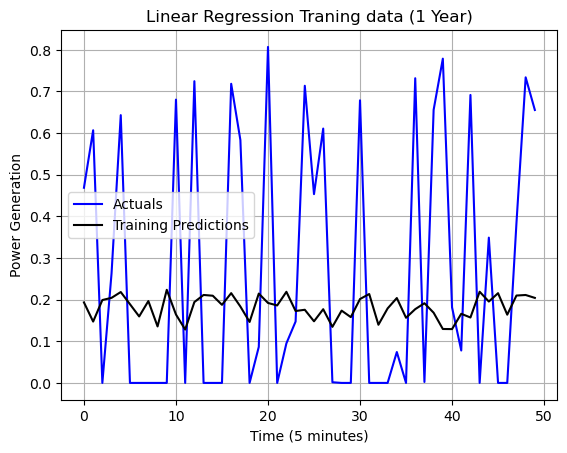

Test RMSE: 0.2630697351530589


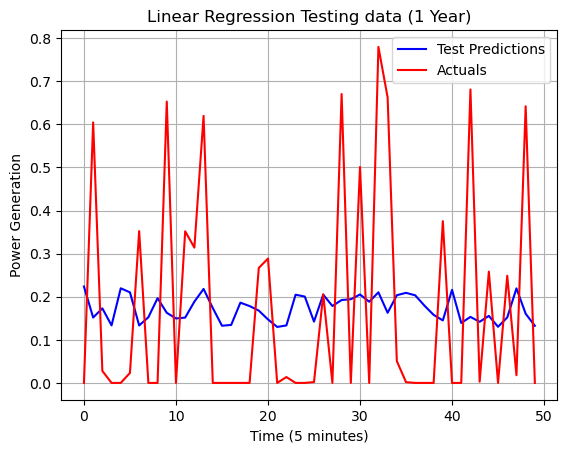

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Read the data
data = pd.read_csv('/Users/choon/OneDrive/Desktop/SIT FYP/KCL FYP/Testings/Degradation/Linear Regression Dataset3.4.csv')
data.head()

# Extract features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MinMaxScaler for X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data for X and y
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Transform the test data
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Fit the Simple Linear Regression Model on scaled data
LinReg = LinearRegression()
LinReg.fit(X_train_scaled, y_train_scaled)

# Predict on scaled training and test data
y_train_predict_scaled = LinReg.predict(X_train_scaled)
y_test_predict_scaled = LinReg.predict(X_test_scaled)

# Visualize the results for training data
train_rmse = np.sqrt(metrics.mean_squared_error(y_train_scaled, y_train_predict_scaled))
print('Training RMSE:', train_rmse)

# Assuming X_train_scaled has more than one feature, we select the first feature for plotting
# Plotting the first 50 data points
plt.plot(y_train_scaled[:50], label='Actuals', color='blue')
plt.plot(y_train_predict_scaled[:50], label='Training Predictions', color='black')
plt.title('Linear Regression Traning data (1 Year)')
plt.xlabel('Time (5 minutes)')
plt.ylabel('Power Generation')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the results for test data
test_rmse = np.sqrt(metrics.mean_squared_error(y_test_scaled, y_test_predict_scaled))
print('Test RMSE:', test_rmse)

test_results = pd.DataFrame({'Actuals': y_test_scaled.flatten(), 'Test Predictions': y_test_predict_scaled.flatten()})
# Plotting the results
plt.plot(test_results['Test Predictions'][0:50], label='Test Predictions', color='blue')
plt.plot(test_results['Actuals'][0:50], label='Actuals', color='red')
plt.title('Linear Regression Testing data (1 Year)')
plt.xlabel('Time (5 minutes)')
plt.ylabel('Power Generation')
plt.legend()
plt.grid(True)
plt.show()
